In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
# load the data 
data = 'income.csv'
df = pd.read_csv(data)
df.head()

,Unnamed: 0,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


In [5]:
df = df.drop(columns = ['Unnamed: 0', 'Territorio', 'Income_tot'])

In [6]:
df.head()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf
0,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0
1,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0
2,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0
3,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0
4,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0


In [9]:
print(f"the shape of df is {df.shape}")

the shape of df is (7891, 8)


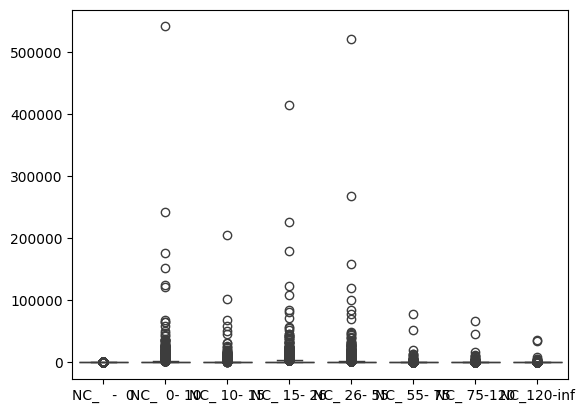

In [11]:
sns.boxplot(df)
plt.show()

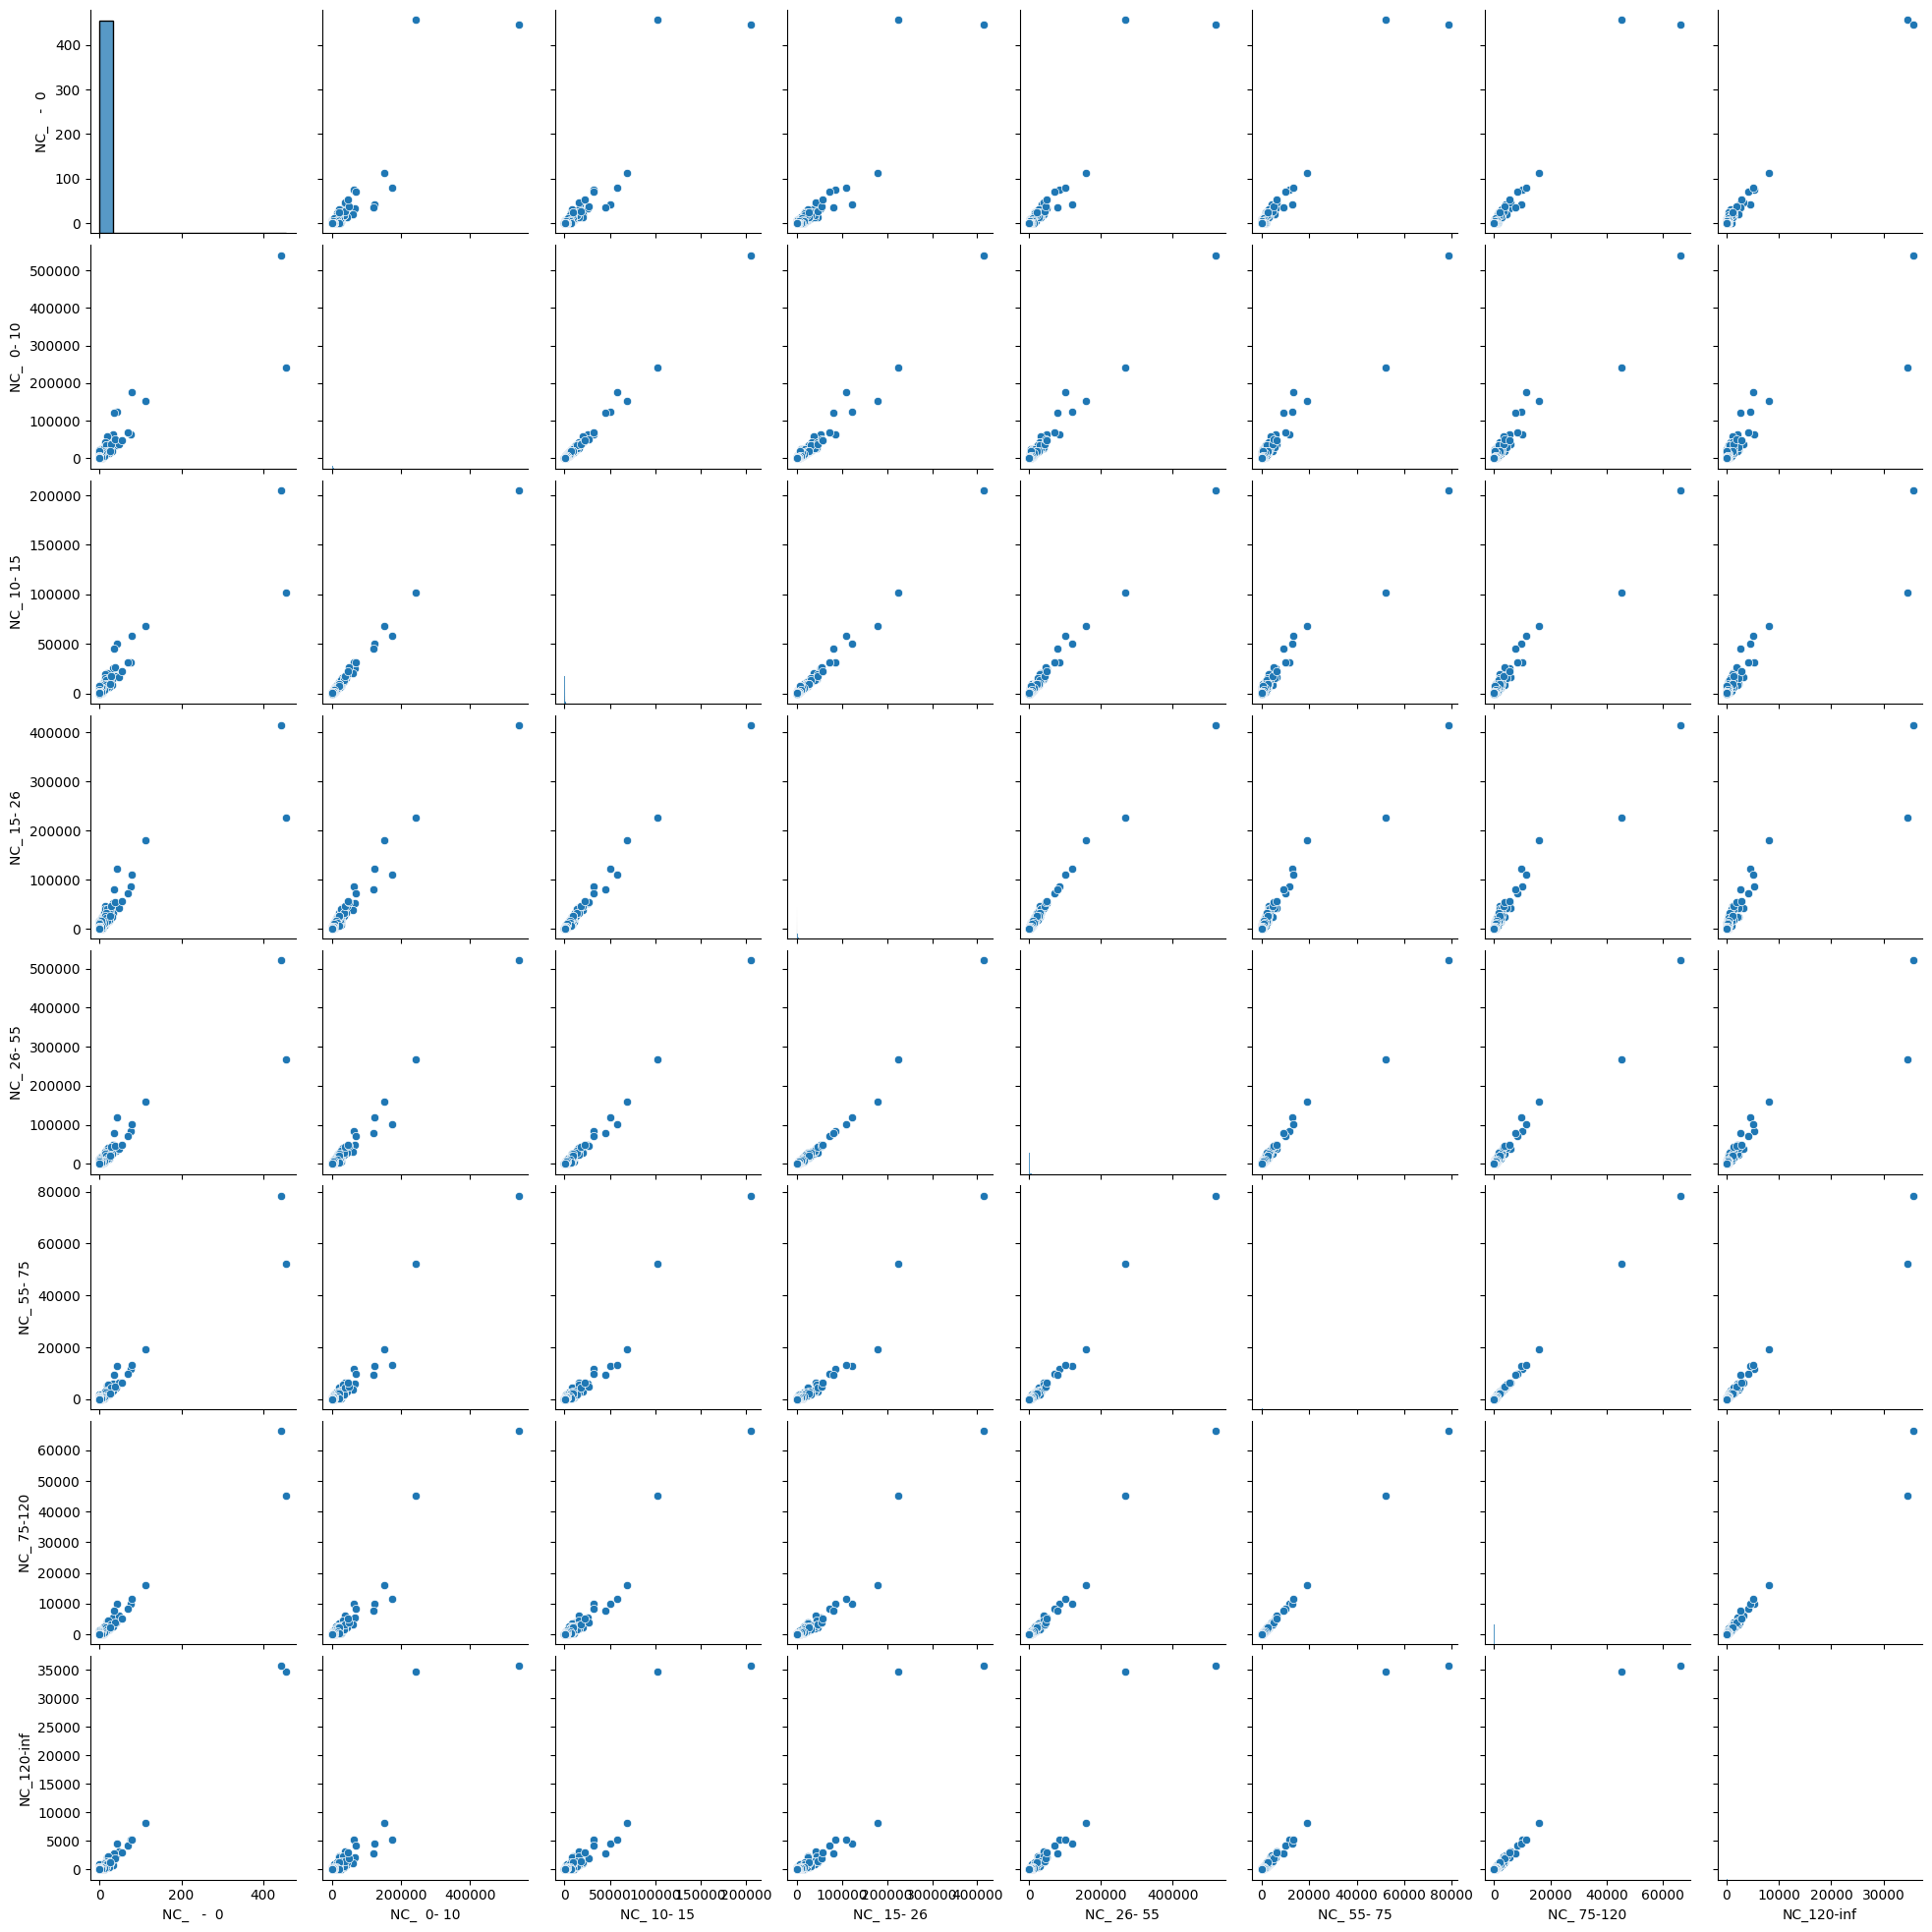

In [12]:
sns.pairplot(df)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X = pt.fit_transform(df)
X = pd.DataFrame(X, columns = df.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = df.columns)


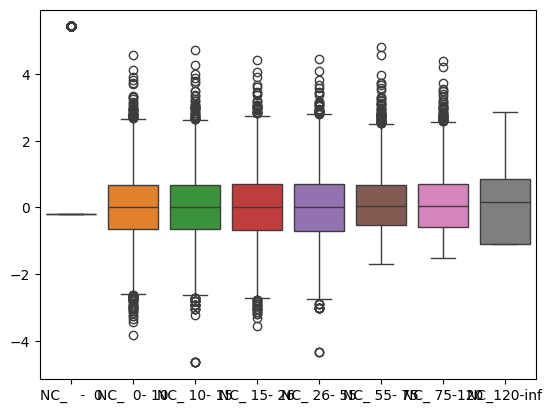

In [17]:
sns.boxplot(X)
plt.show()

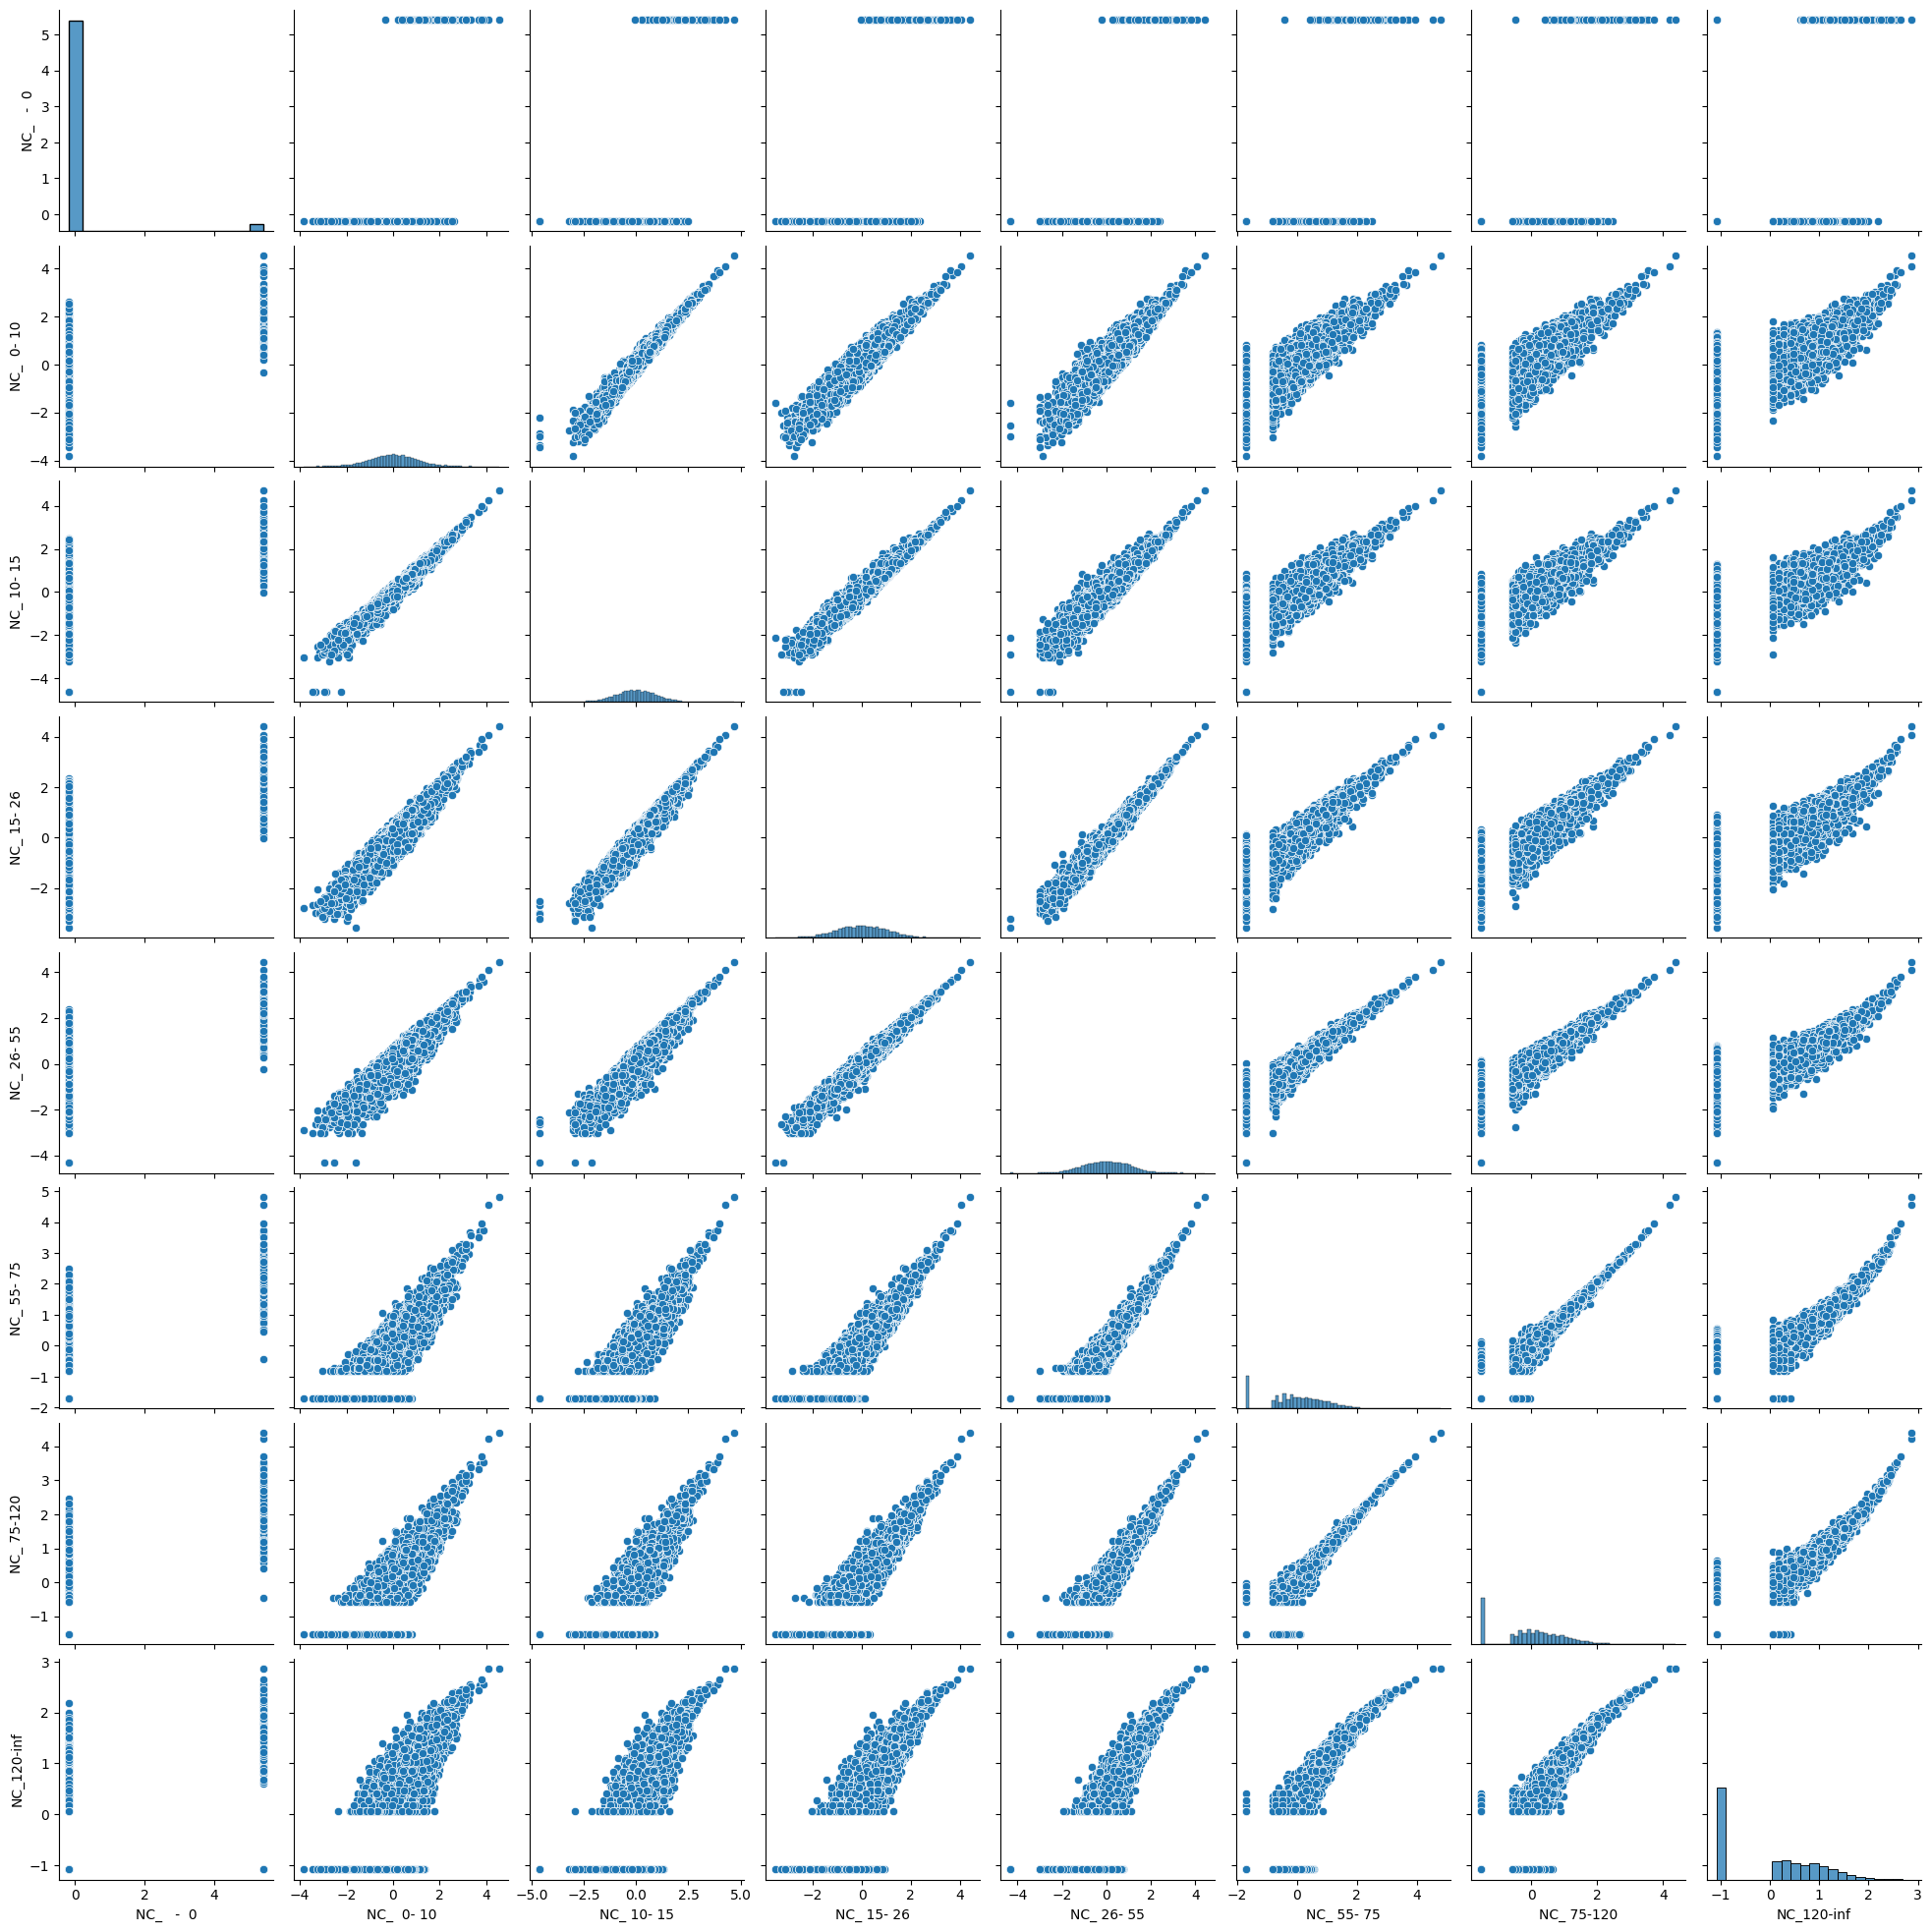

In [18]:
sns.pairplot(X)
plt.show()

In [22]:
# now we can start with clustering 
# we use AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
rs = 42

results = pd.DataFrame(columns = ['n_clusters', 'linkage', 'silhouette'])

for k in range(2, 11):
    for linkage in ['ward', 'complete', 'average', 'single']:
        
        ac = AgglomerativeClustering( n_clusters = k, linkage = linkage)
        pred = ac.fit_predict(X)
        sil = silhouette_score(X, pred)
        results.loc[len(results)] = [k, linkage, sil]

results

,n_clusters,linkage,silhouette
0,2,ward,0.434722
1,2,complete,0.621986
2,2,average,0.621881
3,2,single,0.621881
4,3,ward,0.362421
5,3,complete,0.342127
6,3,average,0.483958
7,3,single,0.521863
8,4,ward,0.398233
9,4,complete,0.287212
